<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica5_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIZ ILEANA RODRIGUEZ GAMEZ
25/Feb/2023

----

<h1><center>Monte Carlo</center></h1>
    
    
El algoritmo se basa en el muestreo aleatorio repetido en un intento de determinar la probabilidad. Esto significa simular un evento con entradas aleatorias un gran número de veces para obtener su estimación. 
    
Las simulaciones Monte Carlo se pueden utilizar en una amplia gama de campos que van desde la economía, el juego, la ingeniería, la energía y cualquier otro campo intermedio. Por lo tanto, no importa en qué campo profesional se encuentre, es algo excelente que debe conocer.

---

Al aprender a construir simulaciones Monte Carlo, es mejor comenzar con un modelo básico para comprender los fundamentos. La forma más fácil y común de hacerlo es con juegos simples, por lo que utilizaremos un juego de dados en este caso. 

Probablemente haya escuchado el dicho, "la casa siempre gana", así que para este ejemplo, la casa (típicamente un casino) tendrá una ventaja, y mostraremos lo que eso significa para las posibles ganancias del jugador.



## El juego de dados

Nuestro juego simple involucrará dos dados de seis caras. 

Para ganar, el jugador debe sacar el mismo número en ambos dados. 

Un dado de seis caras tiene seis resultados posibles (1, 2, 3, 4, 5 y 6). Con dos dados, ahora hay 36 resultados posibles (1 y 1, 1 y 2, 1 y 3, etc., o 6 x 6 = 36 posibilidades). 

En este juego, la casa tiene más oportunidades de ganar (30 resultados frente a los 6 resultados del jugador), lo que significa que la casa tiene bastante ventaja.

---

Digamos que nuestro jugador comienza con un saldo de 1,000 y está preparado para perderlo todo, por lo que apuesta 1 en cada tirada (lo que significa que se tiran ambos dados) y decide jugar 1,000 tiradas. Debido a que la casa es tan generosa, ofrecen pagar 4 veces la apuesta del jugador cuando el jugador gana. 

Por ejemplo, si el jugador gana la primera tirada, su saldo aumenta en $4 y finaliza la ronda con un saldo de 1,004. Si milagrosamente lograban una racha de 1000 victorias, podrían irse a casa con 5000. Si perdía todas las rondas, podrían irse a casa sin nada. No es una mala relación riesgo-recompensa… o tal vez lo sea.

In [2]:
# Importando paqueterias
import matplotlib.pyplot as plt
import random

Ahora, debemos definir nuestra función que genere valores entre 1 y 6 para ambos dados. Podemos auxiliarnos con la funcion *random.randint()*

Tomando en consideración la condición de que si el dado 1 es identico al dado 2, tendremos un resultado positivo en la apuesta, caso contrario, tendremos una derrota.

In [ ]:
# Creando funcion de lanzamiento de dados
def roll_dice():
    same_num = []
    event=(random.randint(1, 6), random.randint(1, 6))
    if event [0]==event[1]:
      same_num = True
    else:
      same_num = False
    return same_num

In [ ]:
roll_dice()


True

Cada simulación Monte Carlo requerirá que sepa cuáles son sus entradas y qué información está buscando obtener. 

En esta práctica, ya definimos cuáles son nuestras entradas cuando describimos el juego. **Dijimos que nuestra cantidad de tiradas por juego es 1,000, y la cantidad que el jugador apostará en cada tirada es $1**. 

Además de nuestras variables de entrada, necesitamos definir cuántas veces queremos simular el juego. Podemos usar la variable num_simulations como nuestro conteo de simulación de Monte Carlo. Cuanto más alto hagamos este número, más precisa será la probabilidad predicha de su valor real.

La cantidad de variables que podemos rastrear generalmente aumenta con la complejidad de un proyecto, por lo que es importante precisar sobre qué información deseamos trabajar. 

Para este caso, realizaremos un seguimiento de la probabilidad de ganar (ganancias por juego divididas por el número total de tiradas) y el saldo final para cada simulación (o juego). Estos se inicializan como listas y se actualizarán al final de cada juego.

In [4]:
# Entradas
num_simulations = 10000 #Valor dado
max_num_rolls = 1000 #<COMPLETA>
bet = 1 #<COMPLETA>

# Seguimiento
win_probability = [] #<COMPLETA>
end_balance = [] #<COMPLETA>

### Configuración de la figura

El siguiente paso es configurar nuestra figura antes de ejecutar la simulación. Al hacer esto antes de la simulación, nos permite agregar líneas a nuestra figura después de cada juego. Luego, una vez que hayamos ejecutado todas las simulaciones, podemos mostrar la gráfica para mostrar nuestros resultados.

(0.0, 1000.0)

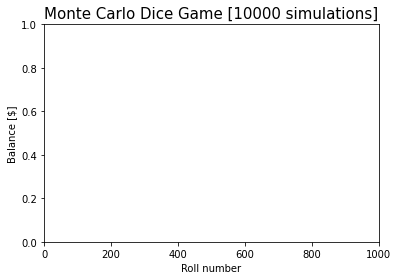

In [5]:
# Creando figura para los ejemplos de simulacion
fig = plt.figure()
plt.title("Monte Carlo Dice Game [" + str(num_simulations) + " simulations]", size=15) 
plt.xlabel("Roll number")
plt.ylabel("Balance [$]")
plt.xlim([0, max_num_rolls]) 

En el siguiente código, tenemos un bucle for externo que itera a través de nuestro número predefinido de simulaciones (10 000 simulaciones) y un bucle while anidado que ejecuta cada juego (1000 tiradas). 

Antes de comenzar cada ciclo while, inicializamos el saldo del jugador como $1,000 (como una lista para fines de trazado) y un conteo de tiradas y ganancias.

    * Nuestro bucle while simulará el juego durante 1000 tiradas. Dentro de este bucle, lanzamos los dados y usamos la variable booleana devuelta por roll_dice() para determinar el resultado. Si los dados son del mismo número, agregamos 4 veces la apuesta a la lista de saldo y agregamos una ganancia al conteo de ganancias. Si los dados son diferentes, restamos la apuesta de la lista de saldo. Al final de cada lanzamiento, agregamos un conteo a nuestra lista num_rolls.

Una vez que el número de lanzamientos llega a 1000, podemos calcular la probabilidad de ganar del jugador como el número de ganancias dividido por el número total de lanzamientos. 

También podemos almacenar el saldo final del juego completo en la variable de seguimiento end_balance. Finalmente, podemos trazar las variables num_rolls y balance para agregar una línea a la figura que definimos anteriormente.

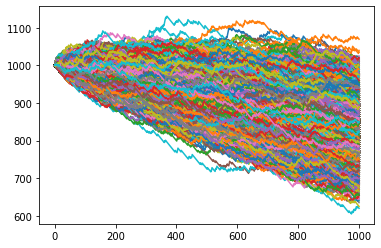

In [ ]:
# For para ejecutar todas las simulaciones deseadas
for i in range(10000): 
    balance = [1000] 
    num_rolls = [0] 
    num_wins = 0 
    
    while num_rolls[-1] < max_num_rolls:
        same = roll_dice()     
        if same:
          balance.append(balance[-1] + 4 * bet)   # -1 jala la última entrada de la lista
          num_wins+=1
        else: 
          balance.append(balance[-1] - bet)

        num_rolls.append(num_rolls[-1] + 1)# Store tracking variables and add line to figure
    
    win_probability.append(num_wins/num_rolls[-1]) #<COMPLETA>
    end_balance.append(balance[-1])    # balance final en cada vuelta  
    plt.plot(num_rolls, balance)   

In [ ]:
len(win_probability), sum(win_probability)

(10000, 1665.3419999999971)

In [ ]:
# Probabilidad promedio de victoria y saldo final
overall_win_probability = sum(win_probability)/len(win_probability) 
overall_end_balance = sum(balance)/len(balance) 
print("Promedio de victorias despues de " + str(num_simulations) + " simulaciones: " + str(overall_win_probability))
print("Saldo promedio despues de " + str(num_simulations) + " simulaciones: $" + str(overall_end_balance))

Promedio de victorias despues de 10000 simulaciones: 0.16653419999999972
Saldo promedio despues de 10000 simulaciones: $922.6023976023976


In [ ]:
print (overall_win_probability)

0.16653419999999972


## Desafio complementario

Ahora, realiza el mismo procedimiento pero mostrando los 
resultados para 10, 100, 1000 y 10000 lanzamientos, considerando 200, 2000 y 20000 simulaciones.

Como bien sabemos, cada que gana el individuo, la casa le pagaba 4 veces el valor de la apuesta.
Ahora, si gana, le pagaran 6 veces mas de lo apostado, siempre y cuando el individuo apueste de 3 en 3.

El monto inicial sería ahora de 800. ¿Cuánta diferencia existe entre los resultados obtenidos para cada escenario?
¿En cuales se tiene un porcentaje mayor de victoria? 

Grafica estos resultados utilizando graficas de pastel y de barras y realiza una comparación entre ellos. 

In [ ]:
#VARIOS ESCENARIO DE 
# Entradas
num_simulations = [200, 2000, 20000]
max_num_rolls = [10, 100, 1000, 10000] 
bet = 3 

# Seguimiento
win_probability = [] 
end_balance = [] 

In [ ]:

# For para ejecutar todas las simulaciones deseadas

def simulations(m, k):
  for i in range(num_simulations[m]): 
        balance = [800] 
        num_rolls = [0] 
        num_wins = 0 
    
        while num_rolls[-1] < max_num_rolls[k]:
            same = roll_dice()     
            if same:
              balance.append(balance[-1] + 6 * bet)   # -1 jala la última entrada de la lista
              num_wins+=1
            else: 
              balance.append(balance[-1] - bet)

            num_rolls.append(num_rolls[-1] + 1)# Store tracking variables and add line to figure
    
        #print(num_rolls[-1])
        #print(balance[-1])
        win_probability.append(num_wins/num_rolls[-1]) 
        end_balance.append(balance[-1])    # balance final en cada vuelta  
        #plt.plot(num_rolls, balance)  

  # Probabilidad promedio de victoria y saldo final

  overall_win_probability = sum(win_probability)/len(win_probability) 
  overall_end_balance = sum(end_balance)/len(end_balance) 
  #print("Promedio de victorias despues de " + str(num_simulations[m]) + " simulaciones: " + str(overall_win_probability) + " y " + str(max_num_rolls[k]) + " de lanzamientos")
  #print("Saldo promedio despues de " + str(num_simulations[m]) + " simulaciones: $" + str(overall_end_balance) + str(overall_end_balance) + " y " + str(max_num_rolls[k]) + " de lanzamientos")
  return overall_win_probability, overall_end_balance


(0.16545000000000043, 818.2625)

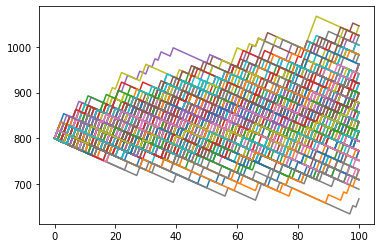

In [ ]:
""" Estos valores de la función son las posoiciones de la lista de 
num_simulations = [200, 2000, 20000] y 
max_num_rolls  = [10, 100, 1000, 10000] """

simulations (0, 1)

In [ ]:
# Escenario con 200 interacciones

import pandas as pd

x1= simulations(0,0)
x2= simulations(0,1)
x3= simulations(0,2)
x4= simulations(0,3)

listax = [x1, x2, x3, x4]
df_probx = pd.DataFrame(listax, columns=['OWP', 'end_balance'])
df_probx['tiradas']=[10, 100, 1000, 10000]
listax

[(0.17150000000000015, 806.015),
 (0.1679500000000001, 825.6275),
 (0.16824166666666707, 998.86),
 (0.1678895000000004, 2207.8775)]

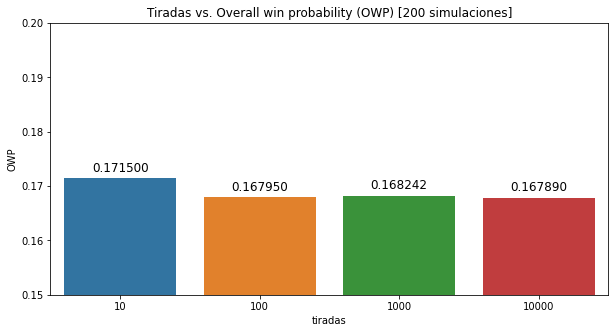

In [ ]:
import seaborn as sns
# Grafica de barra de Tiradas vs. Overall win probability  con 200 simulaciones

plt.figure(figsize=(10,5))
ax=sns.barplot(y=df_probx.OWP, x=df_probx.tiradas)
for p in ax.patches:
    ax.annotate("%.6f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=12, color='black',\
                xytext=(0, 10),\
                textcoords='offset points')


plt.ylim(0.15, 0.20)
plt.title("Tiradas vs. Overall win probability (OWP) [200 simulaciones]")
plt.show()

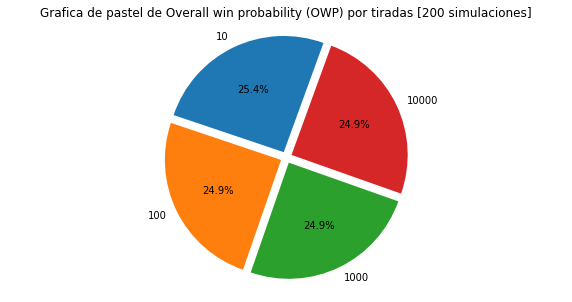

In [ ]:
# Grafica pastel de OWP por tirada con 200 simulaciones
plt.figure(figsize=(10,5))
plt.pie(df_probx.OWP, labels=df_probx.tiradas, autopct = '%1.1f%%', startangle=70, explode = (0.05, 0.05, 0.05, 0.05))
plt.title("Grafica de pastel de Overall win probability (OWP) por tiradas [200 simulaciones]")
plt.axis('equal') 
plt.show()

In [ ]:
# Esceario con 2,000 interacciones

y1= simulations(1,0)
y2= simulations(1,1)
y3= simulations(1,2)
y4= simulations(1,3)

listay = [y1, y2, y3, y4]
df_proby = pd.DataFrame(listay, columns=['OWP', 'end_balance'])
df_proby['tiradas']=[10, 100, 1000, 10000]
listay

[(0.16971842857142977, 1206.389642857143),
 (0.16782949999999974, 1056.5975),
 (0.1675164117647055, 1128.7938235294118),
 (0.1673434318181809, 2194.661818181818)]

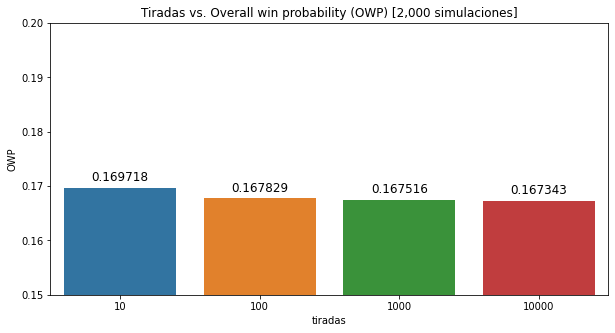

In [ ]:
# Grafica de barra de Tiradas vs. Overall win probability  con 2,000 simulaciones

plt.figure(figsize=(10,5))
ax=sns.barplot(y=df_proby.OWP, x=df_proby.tiradas)

for p in ax.patches:
    ax.annotate("%.6f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=12, color='black',\
                xytext=(0, 10),\
                textcoords='offset points') 

plt.ylim(0.15, 0.20)
plt.title("Tiradas vs. Overall win probability (OWP) [2,000 simulaciones]")
plt.show()

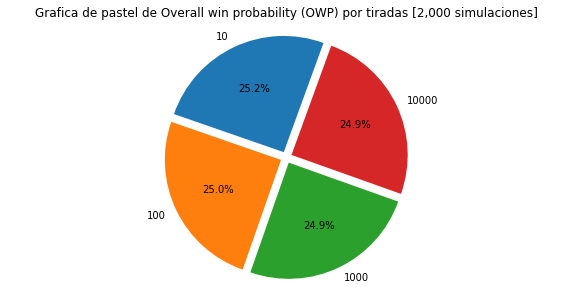

In [ ]:
# Grafica pastel de OWP por tirada con 2,000 simulaciones
plt.figure(figsize=(10,5))
plt.pie(df_proby.OWP, labels=df_proby.tiradas, autopct = '%1.1f%%', startangle=70, explode = (0.05, 0.05, 0.05, 0.05))
plt.title("Grafica de pastel de Overall win probability (OWP) por tiradas [2,000 simulaciones]")
plt.axis('equal') 
plt.show()

In [ ]:
# Con 20,000 interacciones

z1= simulations(2,0)
z2= simulations(2,1)
z3= simulations(2,2)
z4= simulations(2,3)

listaz = [z1, z2, z3, z4]
df_probz = pd.DataFrame(listaz, columns=['OWP', 'end_balance'])
df_probz['tiradas']=[10, 100, 1000, 10000]
listaz

[(0.1663479930555438, 1229.5085416666666),
 (0.1665272991803052, 1074.0745286885247),
 (0.16654134011627933, 1139.1946075581395),
 (0.16657330405405799, 2189.7103716216216)]

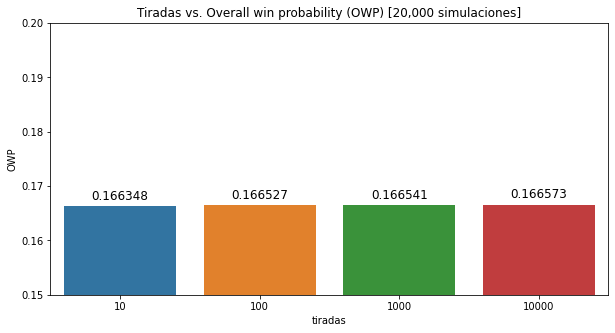

In [ ]:
# Grafica de barra de Tiradas vs. Overall win probability  con 20,000 simulaciones

plt.figure(figsize=(10,5))
ax=sns.barplot(y=df_probz.OWP, x=df_probz.tiradas)

for p in ax.patches:
    ax.annotate("%.6f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=12, color='black',\
                xytext=(0, 10),\
                textcoords='offset points') 

plt.ylim(0.15, 0.20)
plt.title("Tiradas vs. Overall win probability (OWP) [20,000 simulaciones]")
plt.show()

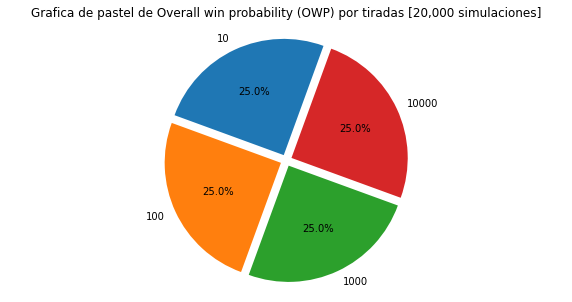

In [ ]:
# Grafica pastel de OWP por tirada con 20,000 simulaciones
plt.figure(figsize=(10,5))
plt.pie(df_probz.OWP, labels=df_proby.tiradas, autopct = '%1.1f%%', startangle=70, explode = (0.05, 0.05, 0.05, 0.05))
plt.title("Grafica de pastel de Overall win probability (OWP) por tiradas [20,000 simulaciones]")
plt.axis('equal') 
plt.show()

 # COMENTARIO: 
**Las diferencias entre los tres escenarios [200, 2,000 y 20,000 simualaciones] es muy pequeña, pero se percibe una probabilidad ligeramente mayor con 10 tiros y 200 o 2,000 simulaciones; en cambio cuando aumentamos las simulaciones a 20,000 no se perciben estos cambios independientemente de cuantas veces se tiren los dados.**

**Aquí otra opcion en la que estuvimos trabajando en el equipo, internalizando todos los parametros.**

In [ ]:
# internalizando todos los parametros 

def dice_game(saldo_inicial, bet, max_num_rolls, num_simulaciones):
  for i in range(num_simulaciones): 
        balance = [saldo_inicial] 
        num_rolls = [0] 
        num_wins = 0 
        win_probability = []
    
        while num_rolls[-1] < max_num_rolls:
            same = roll_dice()     
            if same:
              balance.append(balance[-1] + 6 * bet)   # -1 jala la última entrada de la lista
              num_wins+=1
            else: 
              balance.append(balance[-1] - bet)

            num_rolls.append(num_rolls[-1] + 1)# Store tracking variables and add line to figure
        win_probability.append(num_wins/num_rolls[-1]) 
        end_balance.append(balance[-1])    # balance final en cada vuelta  
        plt.plot(num_rolls, balance)  
        plt.title('Monte Carlo Dice Game ['+ str(num_simulaciones)+' simulations]')
        plt.xlabel('Roll Number')
        plt.ylabel('Balance [$]')
        plt.xlim([0, max_num_rolls])
  return win_probability[-1], end_balance[-1]
  # Probabilidad promedio de victoria y saldo final

  #overall_win_probability = sum(win_probability)/len(win_probability) 
  #overall_end_balance = sum(end_balance)/len(end_balance) 
  #print("Promedio de victorias despues de " + str(num_simulations[m]) + " simulaciones: " + str(overall_win_probability) + " y " + str(max_num_rolls[k]) + " de lanzamientos")
  #print("Saldo promedio despues de " + str(num_simulations[m]) + " simulaciones: $" + str(overall_end_balance) + str(overall_end_balance) + " y " + str(max_num_rolls[k]) + " de lanzamientos")


(0.2, 812)

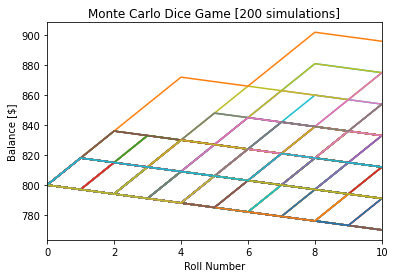

In [ ]:
#dice_game(saldo_inicial, bet, max_num_rolls, num_simulaciones):

dice_game(800, 3, 10, 200)


(0.2, 812)

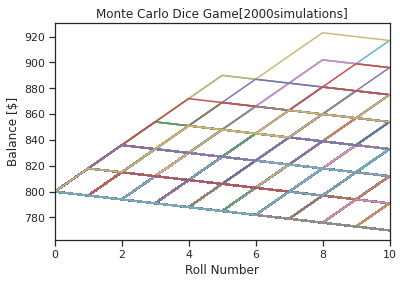

In [ ]:
#dice_game(saldo_inicial, bet, max_num_rolls, num_simulaciones):

dice_game(800, 3, 10, 2000)

(0.1, 791)

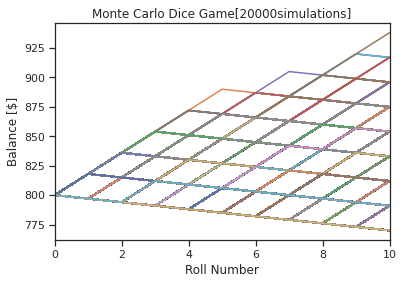

In [ ]:
#dice_game(saldo_inicial, bet, max_num_rolls, num_simulaciones):

dice_game(800, 3, 10, 20000)

## ¿Qué es web scrapping?

Es una técnica para recuperar grandes cantidades de datos de Internet.

-----

Existen diferentes técnicas como Scrappy, BeautifulSoup, etc. La librería más común es BeautifulSoup. 

Extrae la página Html de cualquier sitio web. Los datos almacenados por web Scrapping son un formato no estructurado. Convertimos los datos no estructurados en estructurados para el análisis y la exploración de datos.

------

### Bibliotecas utilizadas para Web Scraping

Como sabemos, Python se usa para varias aplicaciones y existen diferentes bibliotecas para diferentes propósitos. En nuestra demostración adicional, usaremos las siguientes bibliotecas:

   * BeautifulSoup: Beautiful Soup es un paquete de Python para analizar documentos HTML y XML. Crea árboles de análisis que son útiles para extraer los datos fácilmente.
   * Pandas: Pandas es una biblioteca que se utiliza para la manipulación y el análisis de datos. Se utiliza para extraer los datos y almacenarlos en el formato deseado.
   * Utilice matplotlib y seaborn para la visualización de datos

------
### ¿Cómo funciona el Web Scraping?

Cuando ejecuta el código para web scraping, se envía una solicitud a la URL que ha mencionado. Como respuesta a la solicitud, el servidor envía los datos y le permite leer la página HTML o XML. Luego, el código analiza la página HTML o XML, encuentra los datos y los extrae.

Para extraer datos utilizando web scraping con Python, debe seguir estos pasos básicos:

   * Busque la URL que desea raspar
   * Inspecciona la página
   * Encuentra los datos que quieres extraer
   * Escribe el codigo
   * Ejecute el código y extraiga los datos
   * Almacene los datos en el formato requerido

------

-------

### Datos del sitio web de Flipkart

Para comprobar cuál debería ser el precio óptimo de nuestro producto, estos precios pueden variar mucho. Entonces, vamos a mostrar cómo podemos obtener información relacionada con un producto en particular (computadora portátil).

Primero, importemos todas las bibliotecas necesarias:

In [ ]:
#import requests
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#from bs4 import BeautifulSoup

# Imports
from bs4 import BeautifulSoup
import requests
from requests import get
import json
import numpy as np
import pandas as pd
import datetime as dt
import string



Los datos que extraemos son datos no estructurados. Por eso, crearemos listas vacías para almacenarlas de forma estructurada

In [ ]:
name=[]
prices=[]
ratings=[]
df = pd.DataFrame()

## Paso 1: busque la URL

Para este ejemplo, vamos a **raspar** (Scrap) el sitio web de **Flipkart** para extraer el nombre, el precio y la calificación de las computadoras portátiles. La URL de esta página es:

[Flipkart](https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.)

In [ ]:
# Definir la homepage

flipkart_url = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY."

In [ ]:
# Usamos requests para obtener los datos de la URL dada

flipkart_response = requests.get(flipkart_url)
flipkart_response


<Response [200]>

### Paso 2: inspección de la página

Los datos suelen estar anidados en etiquetas. Entonces, inspeccionamos la página para ver, bajo qué etiqueta están anidados los datos que queremos raspar. Para inspeccionar la página, simplemente haga clic derecho en el elemento y haga clic en "Inspeccionar" (o F12).

![img](https://miro.medium.com/max/571/0*TF2VBxPanqhxb-hY.png)

### Paso 3: busque los datos que desea extraer

Extraemos el nombre, precio y calificación que están anidados en la etiqueta "div" respectivamente.

Por lo general, nos confundiremos sobre qué etiqueta necesitamos copiar para esta computadora portátil. Podemos usar https://webformatter.com/ para filtrar la etiqueta por el nombre, el precio y la calificación, y podemos copiar fácilmente con esta herramienta.

Ahora que hemos escrito el código para abrir la URL, es hora de extraer los datos del sitio web. Como se mencionó anteriormente, los datos que queremos extraer están anidados en etiquetas <div>. Entonces, encontraremos las etiquetas div con esos respectivos nombres de clase, extraeremos y almacenaremos los datos en una variable. Consulte el código a continuación:

In [ ]:
flipkart_url = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY."
flipkart_page = get(flipkart_url).content

# Transformamos todo el codigo HTML usando beautiful soup
flipkart_soup=BeautifulSoup(flipkart_page,'html.parser')
main_box = flipkart_soup.find_all(name='div',attrs={'class':'_13oc-S'})


In [ ]:
len(main_box)

24

In [ ]:
box=main_box[0]
box

<div class="_13oc-S"><div data-id="COMG9VHHF6HVJPP9" style="width:100%"><div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" href="/lenovo-ideapad-3-ryzen-5-hexa-core-5500u-8-gb-512-gb-ssd-windows-11-home-15alc6-thin-light-laptop/p/itm790def6ef6b6f?pid=COMG9VHHF6HVJPP9&amp;lid=LSTCOMG9VHHF6HVJPP9U213LU&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_GY2cGaZZUa9nIdPfECjQE4sL8qyoMvpExpuOJyXIxekkRGdi7tm9TNk5No5wHAYyS4lXn4otu4VE1o4S8e22qA%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=bx8vpw2k8w0000001677864918492&amp;qH=c06ea84a1e3dc3c6" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15ALC6 Thin and Light Lap..." class="_396cs4" loading="eager" src="https://rukminim1.flixcart.com/image/312/312/xif

In [ ]:
title = box.find('div', {'class':'_4rR01T'}).text.strip()
rating = box.find('div', {'class':'_3LWZlK'}).text.strip()
price = box.find('div', {'class':'_30jeq3 _1_WHN1'}).text.replace('₹','').strip()

In [ ]:
print(title,price,rating)

Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15ALC6 Thin and Light Lap... 45,126 4.3


In [ ]:
data_list=[]
for box in main_box:
    temp_dict={}
    if not box.find('div', {'class':'_3LWZlK'}):
        temp_dict['rating'] = "unknown"
    else:
        temp_dict['rating'] = box.find('div', {'class':'_3LWZlK'}).text.strip()  
    
    temp_dict['title'] = box.find('div', {'class':'_4rR01T'}).text.strip()
    temp_dict['price'] = box.find('div', {'class':'_30jeq3 _1_WHN1'}).text.replace('₹','').strip()

    data_list.append(temp_dict)

In [ ]:
data_list

[{'rating': '4.3',
  'title': 'Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15ALC6 Thin and Light Lap...',
  'price': '45,126'},
 {'rating': '4.4',
  'title': 'Lenovo IdeaPad Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce...',
  'price': '52,990'},
 {'rating': '4.4',
  'title': 'ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...',
  'price': '49,990'},
 {'rating': '4.3',
  'title': 'ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...',
  'price': '32,990'},
 {'rating': '4.2',
  'title': 'HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop',
  'price': '35,490'},
 {'rating': '4.1',
  'title': 'ASUS VivoBook 14 (2021) Celeron Dual Core - (4 GB/256 GB SSD/Windows 11 Home) X415MA-BV011W Thin and L...',
  'price': '21,990'},
 {'rating': '4.7',
  'title': 'APPLE 

### Paso 4: Crear un dataframe y guardar los datos en csv

Después de extraer los datos, es posible que desee almacenarlos en un formato. Este formato varía según sus necesidades. Para este ejemplo, almacenaremos los datos extraídos en formato CSV (valores separados por comas). Para hacer esto, agregaré las siguientes líneas a mi código:

In [ ]:
#<COMPLETA>
df = pd.DataFrame(data_list)
df.head(3)


,rating,title,price
0,4.3,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 ...,"45,126"
1,4.4,Lenovo IdeaPad Ryzen 5 Hexa Core 5600H - (8 GB...,"52,990"
2,4.4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"49,990"


In [ ]:
df.to_csv("test.csv", index=False)

### Paso 5: Un poco de EDA y visualización de este archivo

In [ ]:
#<COMPLETA>
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  24 non-null     object
 1   title   24 non-null     object
 2   price   24 non-null     object
dtypes: object(3)
memory usage: 704.0+ bytes


In [ ]:
#<COMPLETA> | Crea una copia auxiliar llamada laptop_df
# esta copia no afecta al dataframe previo, se usa para estar regresando a este dataframe si cometemos algun error
laptop_df=df.copy()
laptop_df.head(3)

,rating,title,price
0,4.3,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 ...,"45,126"
1,4.4,Lenovo IdeaPad Ryzen 5 Hexa Core 5600H - (8 GB...,"52,990"
2,4.4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"49,990"


Quiero dividir el título debido a todas las especificaciones y nombres de portátiles en una fila.

Lo dividiremos en diferentes columnas por separado usando la opción split ()

In [ ]:
#AHORA ... la cadena en 'title' la dividimos en dos columnas 'model' y 'spec', 
# la marca de la division de la cadena (str) será donde aparezca el simbolo '-' 
# y despues eliminamos la columan 'title' para no duplicar información.

laptop_df['model'], laptop_df['spec'] = laptop_df['title'].str.split('-', 1).str    # el 1 es el numero de veces que se divide la cadena (str)
del laptop_df['title']
laptop_df

<ipython-input-111-4b7714bbaebd>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['model'], laptop_df['spec'] = laptop_df['title'].str.split('-', 1).str    # el 1 es el numero de veces que se divide la cadena (str)


,rating,price,model,spec
0,4.3,"45,126",Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,(8 GB/512 GB SSD/Windows 11 Home) 15ALC6 Thin...
1,4.4,"52,990",Lenovo IdeaPad Ryzen 5 Hexa Core 5600H,(8 GB/512 GB SSD/Windows 11 Home/4 GB Graphic...
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,(8 GB/512 GB SSD/Windows 11 Home/4 GB Graphic...
3,4.3,"32,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,(8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ36...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,(8 GB/256 GB SSD/Windows 11 Home) 14s - dy250...
5,4.1,"21,990",ASUS VivoBook 14 (2021) Celeron Dual Core,(4 GB/256 GB SSD/Windows 11 Home) X415MA-BV01...
6,4.7,"86,990",APPLE 2020 Macbook Air M1,(8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A
7,unknown,"33,990",Lenovo IdeaPad Slim 3 Core i3 11th Gen,(8 GB/256 GB SSD/Windows 11 Home) 15ITL05 Thi...
8,4.2,"29,990",Infinix INBook Y1 Plus Intel Core i3 10th Gen,(8 GB/256 GB SSD/Windows 11 Home) XL28 Thin a...
9,3.9,"18,990",Lenovo Athlon Dual Core,(4 GB/256 GB SSD/DOS) E41-55 45-2 Laptop


Lo que hicimos fue usar esta opción dividida (split "-") para separar del título y crear una columna separada como modelo y especificación y eliminar el título

In [ ]:
#Después ... el contenido de la cadena 'spec' la dividimos en dos columnas 'RAM' y 'HDD', 
#la marca de la division de la cadena será donde aparezca el simbolo '(' 
#y despues eliminamos la columan 'spec' para no duplicar información.

laptop_df['RAM'], laptop_df['HDD'] = laptop_df['spec'].str.split('(', 1).str
del laptop_df['spec']
laptop_df.head()


<ipython-input-112-b1028862e594>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['RAM'], laptop_df['HDD'] = laptop_df['spec'].str.split('(', 1).str


,rating,price,model,RAM,HDD
0,4.3,"45,126",Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,,8 GB/512 GB SSD/Windows 11 Home) 15ALC6 Thin a...
1,4.4,"52,990",Lenovo IdeaPad Ryzen 5 Hexa Core 5600H,,8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/...
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,,8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/...
3,4.3,"32,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,,8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362W...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,,8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507T...


In [ ]:
#AHORA ... la cadena en 'HDD' la dividimos en dos columnas 'RAM' y 'Hard disk', 
#la marca de la division de la cadena (str) será donde aparezca el simbolo '/' por primera vez (por eso el 1... solo una vez se hara la divisision de la cadena) 
#y despues eliminamos la columan 'HDD' para no duplicar información.

laptop_df['RAM'], laptop_df['Hard disk'] = laptop_df['HDD'].str.split('/', 1).str
del laptop_df['HDD']
laptop_df

<ipython-input-113-3cbccdb81977>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['RAM'], laptop_df['Hard disk'] = laptop_df['HDD'].str.split('/', 1).str


,rating,price,model,RAM,Hard disk
0,4.3,"45,126",Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD/Windows 11 Home) 15ALC6 Thin and Li...
1,4.4,"52,990",Lenovo IdeaPad Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDI...
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDI...
3,4.3,"32,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD/Windows 11 Home) 14s - dy2507TU Thi...
5,4.1,"21,990",ASUS VivoBook 14 (2021) Celeron Dual Core,4 GB,256 GB SSD/Windows 11 Home) X415MA-BV011W Thin...
6,4.7,"86,990",APPLE 2020 Macbook Air M1,8 GB,256 GB SSD/Mac OS Big Sur) MGN63HN/A
7,unknown,"33,990",Lenovo IdeaPad Slim 3 Core i3 11th Gen,8 GB,256 GB SSD/Windows 11 Home) 15ITL05 Thin and L...
8,4.2,"29,990",Infinix INBook Y1 Plus Intel Core i3 10th Gen,8 GB,256 GB SSD/Windows 11 Home) XL28 Thin and Ligh...
9,3.9,"18,990",Lenovo Athlon Dual Core,4 GB,256 GB SSD/DOS) E41-55 45-2 Laptop


Continuemos hasta conseguir lo siguiente...

In [ ]:
#AHORA ... la cadena en 'Hard disk' la dividimos en dos columnas 'Storage' y 'OS', 
#la marca de la division de la cadena (str) será donde aparezca el simbolo '/' por primera vez (por eso el 1... solo una vez se hara la divisision de la cadena) 
#y despues eliminamos la columan 'Hard disk' para no duplicar información.

laptop_df['Storage'], laptop_df['OS'] = laptop_df['Hard disk'].str.split('/', 1).str
del laptop_df['Hard disk']
laptop_df.head()

<ipython-input-114-e9020d5bffc1>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['Storage'], laptop_df['OS'] = laptop_df['Hard disk'].str.split('/', 1).str


,rating,price,model,RAM,Storage,OS
0,4.3,"45,126",Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD,Windows 11 Home) 15ALC6 Thin and Light Lap...
1,4.4,"52,990",Lenovo IdeaPad Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce...
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...
3,4.3,"32,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home) X515JA-EJ362WS | X515JA-E...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home) 14s - dy2507TU Thin and Light...


In [ ]:
#AHORA ... la cadena en 'OS' la dividimos en dos columnas 'System' y 'Other_Info', 
#la marca de la division de la cadena (str) será donde aparezca el simbolo ')' por primera vez (por eso el 1... solo una vez se hara la divisision de la cadena) 
#y despues eliminamos la columan 'OS' para no duplicar información.

laptop_df['System'], laptop_df['Other_Info'] = laptop_df['OS'].str.split(')', 1).str
del laptop_df['OS']
laptop_df.head()

<ipython-input-115-a414d1bbd8d5>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['System'], laptop_df['Other_Info'] = laptop_df['OS'].str.split(')', 1).str


,rating,price,model,RAM,Storage,System,Other_Info
0,4.3,"45,126",Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD,Windows 11 Home,15ALC6 Thin and Light Lap...
1,4.4,"52,990",Lenovo IdeaPad Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce...,NaN
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
3,4.3,"32,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home,X515JA-EJ362WS | X515JA-E...
4,4.2,"35,490",HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,14s - dy2507TU Thin and Light Laptop


### Paso 6: Identificación de valores perdidos

Los métodos isnull () y notnull () son las formas más comunes de identificar valores perdidos.

Mientras maneja los datos faltantes, primero debe identificar las filas y columnas que contienen los valores faltantes, contar el número de valores faltantes y luego decidir cómo desea tratarlos.

Es importante que trate los valores faltantes en cada columna por separado, en lugar de implementar una única solución (por ejemplo, reemplazar los NaN por la media de una columna) para todas las columnas.

isnull () devuelve un valor booleano (Verdadero / Falso) que luego se puede usar para encontrar las filas o columnas que contienen valores perdidos.

In [ ]:
#Identificación de valores perdidos en el dataframe
laptop_df.isnull()

,rating,price,model,RAM,Storage,System,Other_Info
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


### Identificación de valores perdidos en columnas

Primero calculemos el número total de valores faltantes en el marco de datos. Puede calcular el número de valores perdidos en cada columna mediante df.isnull().Sum()

In [ ]:
#Nos devuelve la suma de registros que cuentan con valores perdidos en cada columna del dataframe.
laptop_df.isnull().sum()

rating        0
price         0
model         0
RAM           0
Storage       0
System        0
Other_Info    3
dtype: int64

In [ ]:
#Cuenta el numero de distintos elementos (e.g. modelo) en un axis espeicifico y regresa la serie con el numero de distintos elementos.
laptop_df['model'].nunique()

23

In [ ]:
# Me cuenta cuántos valores de 'modelo' se repiten. 

laptop_df['model'].value_counts()

HP 14s Intel Core i3 11th Gen                       2
Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U            1
HP 15s Intel Core i3 11th Gen                       1
ASUS Vivobook 15 Core i7 11th Gen                   1
Lenovo V15 G2 Core i3 11th Gen                      1
RedmiBook Pro Core i5 11th Gen                      1
HP Ryzen 5 Hexa Core 5500U                          1
ASUS Vivobook 15 Core i5 11th Gen                   1
HP Athlon Dual Core 3050U                           1
AXL Celeron Dual Core                               1
acer Aspire 3 Ryzen 3 Dual Core 3250U               1
HP 15s Intel Core i3 12th Gen                       1
Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD R7    1
Lenovo IdeaPad Ryzen 5 Hexa Core 5600H              1
DELL Vostro Core i3 11th Gen                        1
Lenovo Athlon Dual Core                             1
Infinix INBook Y1 Plus Intel Core i3 10th Gen       1
Lenovo IdeaPad Slim 3 Core i3 11th Gen              1
APPLE 2020 Macbook Air M1   

In [ ]:
# Retorna los estadísticos del dataframe 
laptop_df.describe()

,rating,price,model,RAM,Storage,System,Other_Info
count,24,24,24,24,24,24,21
unique,9,22,23,3,4,7,21
top,4.2,"49,990",HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,15ALC6 Thin and Light Lap...
freq,7,2,2,19,13,17,1


In [ ]:
# Retorna la infromación del dataframe, en este caso todos los datos son objetos
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rating      24 non-null     object
 1   price       24 non-null     object
 2   model       24 non-null     object
 3   RAM         24 non-null     object
 4   Storage     24 non-null     object
 5   System      24 non-null     object
 6   Other_Info  21 non-null     object
dtypes: object(7)
memory usage: 1.4+ KB


Modifiquemos la columna de precio y rating para que sean de tipo numerico

In [ ]:
laptop_df.dtypes

rating        object
price         object
model         object
RAM           object
Storage       object
System        object
Other_Info    object
dtype: object

In [ ]:
"""recuerde que hay valores de 'rating' que son 'unknown'... 
entonces antes de convertir los object en numerico se debe
remplazar el valor de 'unknow' en este caso por '0'. """

laptop_df['rating'] = laptop_df['rating'].replace('unknown', 0)
laptop_df['rating'] = pd.to_numeric(laptop_df['rating'])
laptop_df.dtypes

rating        float64
price          object
model          object
RAM            object
Storage        object
System         object
Other_Info     object
dtype: object

In [ ]:
"""Ahora convertimos el precio a numerico, 
no olvides que el numero tiene un separador de miles (,) 
y debes eliminarlo para hacer la conversion a numero"""

laptop_df['price'] = laptop_df['price'].str.replace(',','')
laptop_df['price'] = pd.to_numeric(laptop_df['price'])
laptop_df['price'].dtypes

dtype('int64')

In [ ]:
# Ahora si podemos tener los descriptivos de las variables numericas del dataframe

laptop_df.describe()


,rating,price
count,24.000000,24.000000
mean,3.883333,40954.416667
std,1.208185,16334.572841
min,0.000000,18040.000000
25%,4.100000,32240.000000
50%,4.200000,38490.000000
75%,4.300000,46990.000000
max,4.700000,86990.000000


In [ ]:
# Verificamos que 'rating' y 'price' sean variables numericas 

laptop_df.dtypes

rating        float64
price           int64
model          object
RAM            object
Storage        object
System         object
Other_Info     object
dtype: object

Ahora necesitamos filtrar las mejores computadoras portátiles con buenas especificaciones, precio y calificación de la lista.

Muestra los siguientes resultados:
 * Laptops en rating <= 4
 * Laptops con rating >= 3.5 y un precio entre 30 y 40 mil $

In [ ]:
# Laptops con un rating <= 4

laptop_df[laptop_df['rating']<=4]

,rating,price,model,RAM,Storage,System,Other_Info
7,0.0,33990,Lenovo IdeaPad Slim 3 Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,15ITL05 Thin and Light Lapt...
9,3.9,18990,Lenovo Athlon Dual Core,4 GB,256 GB SSD,DOS,E41-55 45-2 Laptop
10,4.0,37990,DELL Vostro Core i3 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 11 Home,Vostro 3510 Thin and Light L...
15,0.0,18040,AXL Celeron Dual Core,4 GB,128 GB SSD,Windows 11 Home,AXL14W_LAP01 Thin and Light Laptop
16,4.0,26490,HP Athlon Dual Core 3050U,8 GB,256 GB SSD,Windows 11 Home,14s-fq0568AU Thin and Light Laptop


In [ ]:
# Laptops con rating >= 3.5 y un precio entre 30 y 40 mil 

laptop_df[ (laptop_df.rating>=3.5) & (laptop_df.price>=30000) & (laptop_df.price<=40000) ]

,rating,price,model,RAM,Storage,System,Other_Info
3,4.3,32990,ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home,X515JA-EJ362WS | X515JA-E...
4,4.2,35490,HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,14s - dy2507TU Thin and Light Laptop
10,4.0,37990,DELL Vostro Core i3 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 11 Home,Vostro 3510 Thin and Light L...
19,4.1,38990,RedmiBook Pro Core i5 11th Gen,8 GB,512 GB SSD,Windows 11 Home,Thin and Light Laptop
20,4.4,35490,Lenovo V15 G2 Core i3 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 11 Home,V15 ITL G2 Laptop
22,4.2,39990,HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,14s - dy2508TU Thin and Light Laptop
23,4.1,35990,ASUS Vivobook 15 Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,X515EA-EJ322WS Thin and Light La...


---------

### Visualización de los datos

In [ ]:
#<COMPLETA> ... librerias necesarias 

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns

from matplotlib import pyplot as plt
sns.set(style="ticks")

Realizaremos una gráfica de barras de precio vs rating

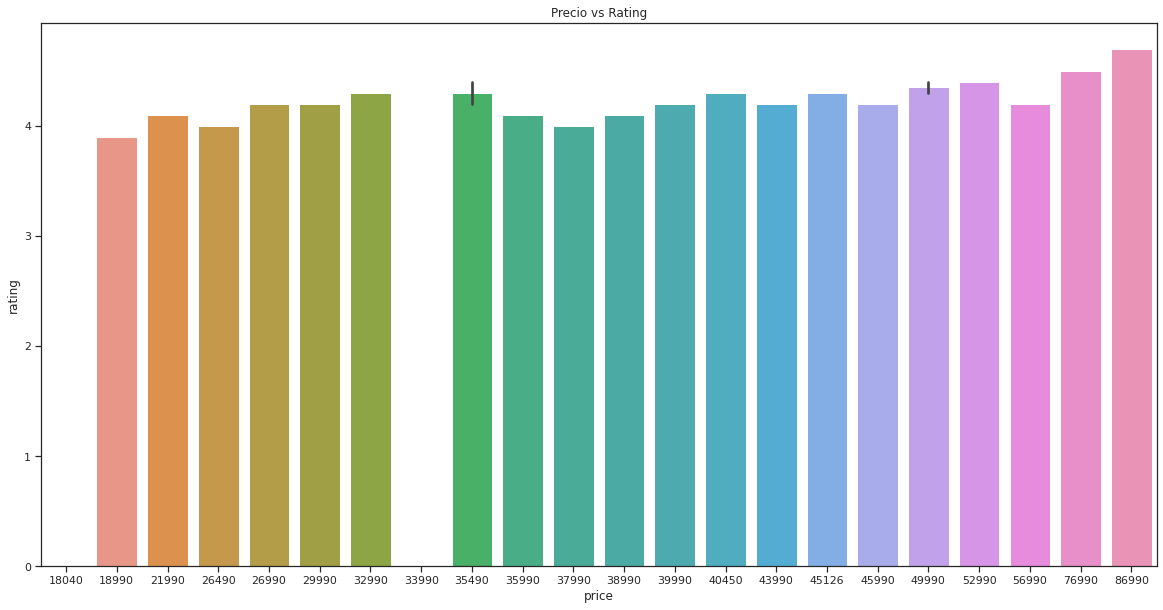

In [ ]:
# Grafica de barra de Precio vs Rating
plt.figure(figsize=(20,10))
sns.barplot(x=laptop_df.price, y=laptop_df.rating)
plt.title("Precio vs Rating")
plt.show()

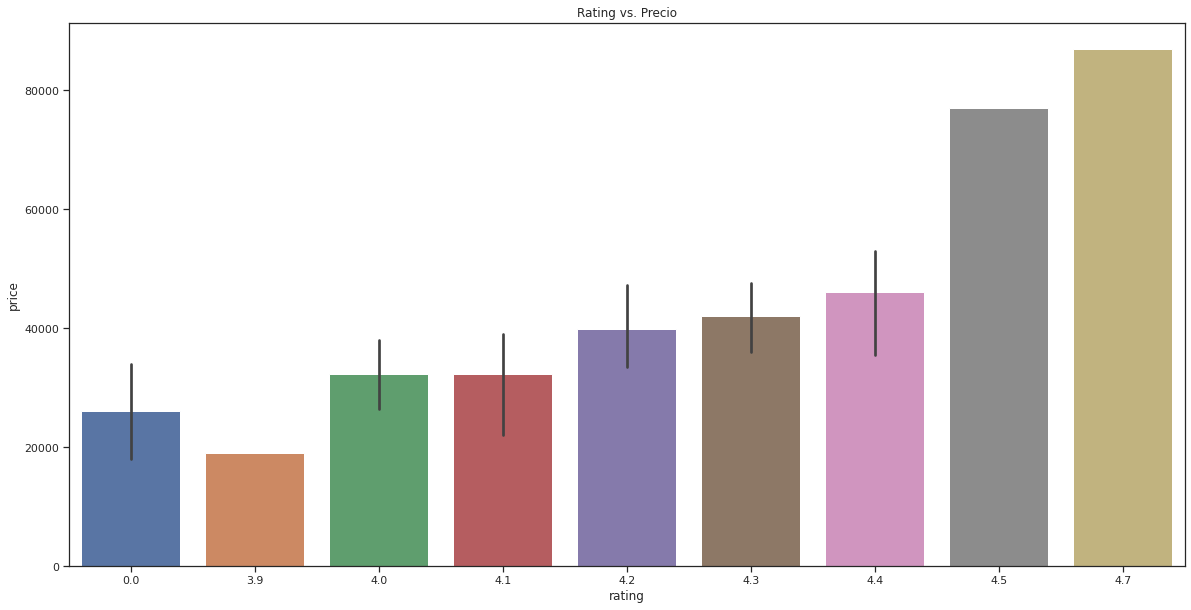

In [ ]:
# Grafica de barra de Rating vs. Precio
plt.figure(figsize=(20,10))
sns.barplot(y=laptop_df.price, x=laptop_df.rating)
plt.title("Rating vs. Precio")
plt.show()

Podemos concluir a partir de aquí que los productos con precios más altos tienen calificaciones más altas hasta cierto punto.

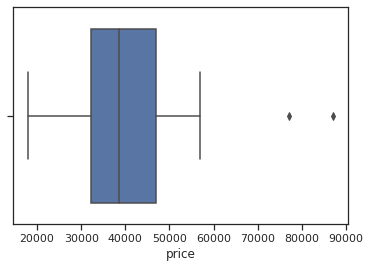

In [ ]:
# Diagrama simple de caja (distibucion de variables 'price')

sns.boxplot(x=laptop_df.price)
plt.show()

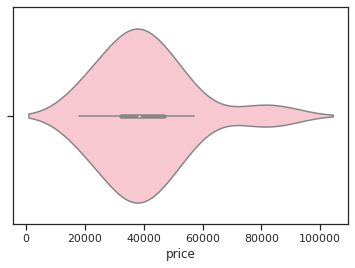

In [ ]:
sns.violinplot(x=laptop_df.price, showmeans = True, color='pink')
"""for pc in violin["bodies"]:
    pc.set_facecolor("green")
    pc.set_edgecolor("black")
    pc.set_alpha(0.5) quantiles = [0.25, 0.5, 0.75]"""
plt.show()

## ¿Les ha salido algún discordante visual a ustedes?

In [ ]:
#<COMPLETA>
laptop_df[laptop_df['price']>60000]

,rating,price,model,RAM,Storage,System,Other_Info
6,4.7,86990,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur,MGN63HN/A
11,4.5,76990,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD R7,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphic...,NaN


### ¿Para ustedes, cuáles fueron las computadoras más caras?

In [ ]:
# Muestra el top5 de computadoras más caras 
laptop_df.sort_values('price', ascending=False).head()

,rating,price,model,RAM,Storage,System,Other_Info
6,4.7,86990,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur,MGN63HN/A
11,4.5,76990,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD R7,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphic...,NaN
21,4.2,56990,ASUS Vivobook 15 Core i7 11th Gen,16 GB,512 GB SSD,Windows 11 Home,X515EA-EJ701WS Thin and Light L...
1,4.4,52990,Lenovo IdeaPad Ryzen 5 Hexa Core 5600H,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce...,NaN
2,4.4,49990,ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
